## 코로나 업종 뉴스 기사 검색

In [1]:
from bs4 import BeautifulSoup 
from urllib.request import Request, urlopen

import pandas as pd
import re

### # 웹크롤링한 데이터 읽어오기

In [3]:
# df = pd.read_csv('data/exam-WebParsing.csv')       
df = pd.read_csv('data//covid_info.csv') 
df.head()

,Unnamed: 0,오늘날짜,기사시점,기사제목,URL
0,0,2022-06-19_21시44분,6시간 전,엔데믹에도 돌아오지 않는 외국인 근로자…대구지역 3D업종 ...,https://www.idaegu.com/newsView/idg202206190033
1,1,2022-06-19_21시44분,1주 전,코로나기간 IT·운수배달 비대면 업종 '활황',https://www.hani.co.kr/arti/economy/finance/10...
2,2,2022-06-19_21시44분,4시간 전,푸틴 리스크…글로벌 금융社 순이익 37% 날아갔다,https://www.hankyung.com/international/article...
3,3,2022-06-19_21시44분,1개월 전,손실보상 사각지대 소상공인에 '경영위기지원금' 100만원,https://mediahub.seoul.go.kr/archives/2004628
4,4,2022-06-19_21시44분,3일 전,최저임금 업종별 구분 적용 논의 본격화…노사 팽팽히 맞서,https://www.hankyung.com/society/article/20220...


In [4]:
# index_col='Unnamed: 0'') 삭제
del df['Unnamed: 0']
df.head()

,오늘날짜,기사시점,기사제목,URL
0,2022-06-19_21시44분,6시간 전,엔데믹에도 돌아오지 않는 외국인 근로자…대구지역 3D업종 ...,https://www.idaegu.com/newsView/idg202206190033
1,2022-06-19_21시44분,1주 전,코로나기간 IT·운수배달 비대면 업종 '활황',https://www.hani.co.kr/arti/economy/finance/10...
2,2022-06-19_21시44분,4시간 전,푸틴 리스크…글로벌 금융社 순이익 37% 날아갔다,https://www.hankyung.com/international/article...
3,2022-06-19_21시44분,1개월 전,손실보상 사각지대 소상공인에 '경영위기지원금' 100만원,https://mediahub.seoul.go.kr/archives/2004628
4,2022-06-19_21시44분,3일 전,최저임금 업종별 구분 적용 논의 본격화…노사 팽팽히 맞서,https://www.hankyung.com/society/article/20220...


### # 첫번째 URL 페이지 크롤링하기

In [4]:
def get_read_web(url):    
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()
    soup = BeautifulSoup(html, "lxml")    
    return soup

In [5]:
news_Text = str()

for i in range(len(df)):
    soup = get_read_web(df['URL'][i])
    news_data = soup.get_text()
    news_text = news_data.replace('\t', ' ')
    news_text = news_text.replace('\n', ' ')
    news_text = news_text.replace('\r', ' ')
    news_text = news_text.strip()
    news_Text = news_Text + news_text

### # 워드클라우드

In [7]:
from konlpy.tag import Okt

In [8]:
okt = Okt()

In [9]:
news_nouns = okt.nouns(news_Text)
news_nouns

['엔데믹',
 '외국인',
 '근로자',
 '대구',
 '지역',
 '업종',
 '인력',
 '극심',
 '대구',
 '일보',
 '모바일',
 '버전',
 '전체',
 '기사',
 '지면',
 '보기',
 '즐겨찾기',
 '회원',
 '가입',
 '로그인',
 '사람',
 '경북',
 '뉴스',
 '정치',
 '경제',
 '사회',
 '문화',
 '교육',
 '피니언',
 '스포츠',
 '포토',
 '특집',
 '대구',
 '일보',
 '사람',
 '경북',
 '뉴스',
 '정치',
 '경제',
 '사회',
 '문화',
 '교육',
 '피니언',
 '스포츠',
 '포토',
 '특집',
 '대구',
 '일보',
 '사회',
 '사회',
 '일반',
 '엔데믹',
 '외국인',
 '근로자',
 '대구',
 '지역',
 '업종',
 '인력',
 '극심',
 '발행',
 '일',
 '댓글',
 '지역',
 '거주',
 '외국인',
 '중',
 '및',
 '비자',
 '소유자',
 '코로나',
 '엔데믹',
 '이후',
 '주문',
 '늘',
 '근로자',
 '수주',
 '외국인',
 '노동자',
 '쿼터',
 '제도',
 '등',
 '관련',
 '정책',
 '기업',
 '족쇄',
 '대구',
 '성서',
 '산업',
 '단지',
 '일대',
 '공장',
 '근로자',
 '구',
 '일부',
 '기계',
 '가동',
 '상태',
 '대구',
 '달서구',
 '위치',
 '자동차',
 '부품',
 '업체',
 '인력',
 '난',
 '어려움',
 '코로나',
 '일상',
 '회복',
 '최근',
 '전보',
 '일감',
 '정작',
 '근로자',
 '부족',
 '공장',
 '가동',
 '제대로',
 '때문',
 '지난해',
 '해도',
 '외국인',
 '근로자',
 '명',
 '지금',
 '명',
 '대구',
 '지역',
 '중소기업',
 '외국인',
 '근로자',
 '감소',
 '인력',
 '난',
 '코로나',
 '로',
 '고국',
 '외국인',
 '근로자',


In [10]:
news_nouns[:10]

['엔데믹', '외국인', '근로자', '대구', '지역', '업종', '인력', '극심', '대구', '일보']

In [11]:
one_words = []
tow_words = []
etc_words = []

for noun in news_nouns:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(15753, 79148, 22533)

In [83]:
stop_words = ['뉴스','한경','기사','업종','코로나',
              '기자','전체','구독','보기','메뉴',
              '바로가기','스포츠','연합뉴스','검색',
              '검색','관련','신문','대비','번호',
              '한겨레','센터','경우','한국']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
len(stop_words)

15776

In [84]:
# stop_words 빼기
news_nouns = [ word for word in news_nouns if word not in stop_words ]
len(news_nouns)

92707

In [14]:
import nltk

In [85]:
news_text = nltk.Text(news_nouns)
type(news_text), len(news_text)

(nltk.text.Text, 92707)

In [86]:
# 상위 30개 수 
data = news_text.vocab().most_common(500)
# data = news_text.vocab()
data

[('관광', 733),
 ('경제', 699),
 ('산업', 530),
 ('글로벌', 433),
 ('정책', 424),
 ('정부', 419),
 ('기업', 406),
 ('마켓', 379),
 ('사회', 359),
 ('신청', 350),
 ('지원', 347),
 ('증가', 324),
 ('매출', 316),
 ('시장', 310),
 ('일반', 306),
 ('서비스', 279),
 ('광고', 278),
 ('노미', 270),
 ('금리', 263),
 ('서울', 250),
 ('문화', 249),
 ('이슈', 248),
 ('감소', 247),
 ('지수', 246),
 ('지역', 227),
 ('종목', 226),
 ('화장품', 218),
 ('미래', 215),
 ('관리', 212),
 ('여행', 210),
 ('영상', 208),
 ('정보', 206),
 ('등록', 205),
 ('고용', 202),
 ('국제', 201),
 ('공유', 201),
 ('해외', 200),
 ('정치', 198),
 ('기후', 197),
 ('영업', 194),
 ('칼럼', 193),
 ('회복', 192),
 ('소개', 188),
 ('상황', 187),
 ('방역', 185),
 ('교육', 183),
 ('가장', 181),
 ('미국', 180),
 ('과학', 178),
 ('이용', 171),
 ('세계', 170),
 ('금융', 168),
 ('금지', 167),
 ('포토', 165),
 ('기간', 164),
 ('피니언', 163),
 ('올해', 163),
 ('호텔', 163),
 ('매물', 159),
 ('채권', 159),
 ('발행', 156),
 ('생활', 155),
 ('물가', 153),
 ('일본', 153),
 ('콘텐츠', 151),
 ('이후', 150),
 ('인사', 148),
 ('업체', 147),
 ('중국', 147),
 ('연재', 146),
 ('위해', 145),
 

### # 워드클라우드 한글폰트 설정

In [72]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [87]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

500

In [ ]:
# !pip install wordcloud

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [88]:
# relative_scaling : 글자 간 간격
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

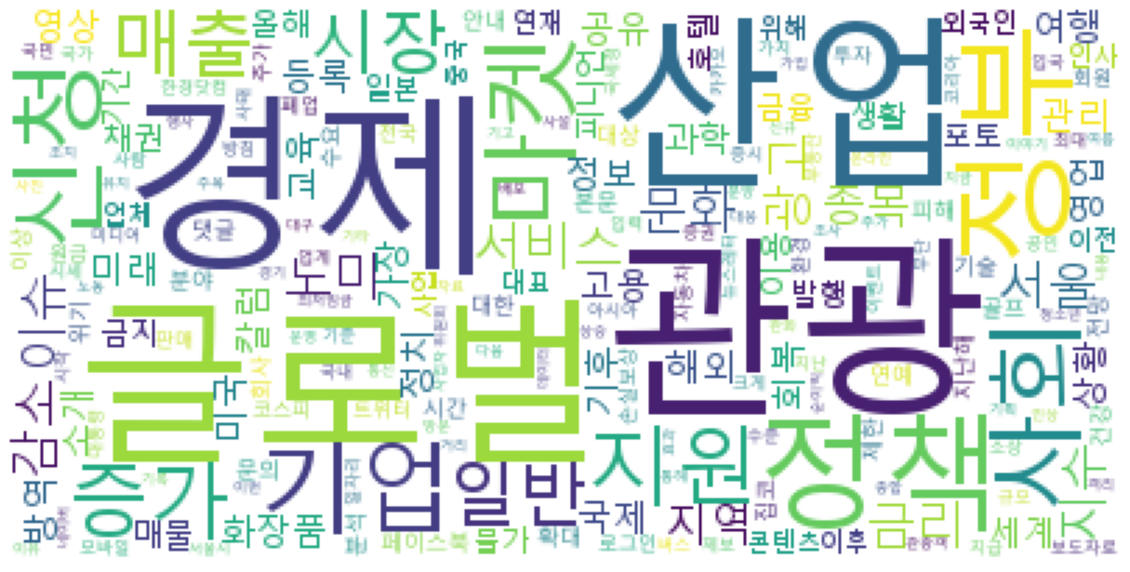

In [89]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

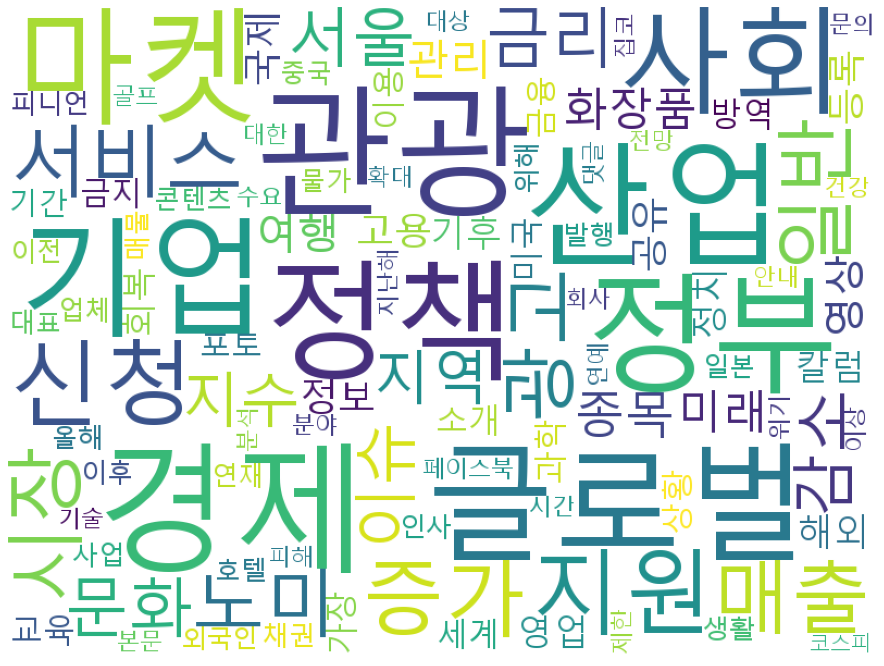

In [95]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
#     "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'wordcloud/wc_covid1.png'

plt.figure(figsize=(20,12))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)